# NT26559-1 <br>
## author: Chris Allen <br> 
<br>

Triple shell nanoparticles CsNiCr \ CsNiCo \ CsCoCr

In [1]:
%matplotlib notebook

In [2]:
import hyperspy.api as hs
hs.preferences.GUIs.warn_if_guis_are_missing = False
hs.preferences.save()
import os
from hyperspy.drawing._widgets.scalebar import ScaleBar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
import matplotlib
import matplotlib.patches as patches
#supress all warnings:
#import warnings
#warnings.filterwarnings("ignore")

from IPython.display import HTML, display

#def hide_code():
display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))

#hide_code()


In [3]:
#make pretty plots
def pretty_fig(hs_object, loc = 4, scale_bar_size = 10, font_size = 12, scale_bar_height = 4, scale_bar_color = 'white', pad = 0.1,  axis_on = False, scale_bar_units = 'nm', cmap = None):
    '''
    loc : int
    Location of this size bar. Valid location codes are:
    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4,
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10
    '''
    #create figure
    fig = plt.figure(figsize=(4, 4))  # in inches
    ax = plt.axes()
    #plot
    this_plot = ax.imshow(
        hs_object.data,
        cmap = cmap)#, 
        #interpolation='nearest',
        #origin='upper', 
        #extent=hs_object.axes_manager.signal_extent)
    
    if axis_on == False:
        #turn off axis
        plt.axis('off')
        
    #get px size 
    scale_bar_px = round(scale_bar_size / hs_object.axes_manager['x'].scale)
    
    #get units
    dat_scale_bar_units = hs_object.axes_manager['x'].units
    
    factor = {'um':1000,'µm' : 1000, 'nm':1 }
    scale = factor[dat_scale_bar_units] /  factor[scale_bar_units]

    
    # Make scalebar on the image
    fontprops = fm.FontProperties(size=font_size)
    scalebar0 = AnchoredSizeBar(
            ax.transData,
            scale_bar_px/ scale, 
            str(scale_bar_size ) + ' ' + scale_bar_units,
            loc,
            pad=pad,
            color=scale_bar_color,
            frameon=False,
            label_top=True,
            size_vertical=scale_bar_height,
            fontproperties=fontprops)

    # The next line is needed due to a bug in matplotlib 2.0
    scalebar0.size_bar.get_children()[0].fill = True
    ax.add_artist(scalebar0)
    
    #plt.tight_layout(True)
    return fig, ax

In [4]:
#load dm4 files into a stack
visit_path = '/dls/e01/data/2020/nt26559-1'
data_path = visit_path + '/raw/Talal cubes'
fig_save_path = visit_path + '/processing/figures'
if not os.path.exists(fig_save_path):
   os.makedirs(fig_save_path)

s = hs.load(data_path + '/*.dm4', stack = False)
n_img = 18
#s[n_img].plot()

## data-set SI-022
### EELS analysis

In [7]:
#ok SI data sets: SI-020 , SI-022, SI-023
si = hs.load(data_path + '/SI-022/*.dm4')


<IPython.core.display.Javascript object>


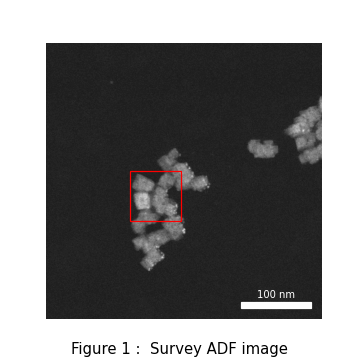

In [8]:
#create images to save
fig1, ax1 = pretty_fig(si[3], scale_bar_size = 100, pad = 1, font_size = 8, scale_bar_height = 20, scale_bar_color = 'white' )
#add SI region
si_area = si[4].original_metadata['ImageList']['TagGroup0']['ImageTags']['SI']['Acquisition']['Survey Image']['Spectrum Image Rect']
si_area_wh = si_area[2] - si_area[0], si_area[3] - si_area[1]

# Create a Rectangle patch
rect = patches.Rectangle((si_area[1],si_area[0]),si_area_wh[0],si_area_wh[1],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect)
#plt.tight_layout(False)
fig1_caption="Figure 1 :  Survey ADF image"
txt = plt.figtext(0.5, 0.01, fig1_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout(True)
plt.show()

#save
#plt.savefig(fig_save_path + '/survey.png', dpi = 300)



<IPython.core.display.Javascript object>


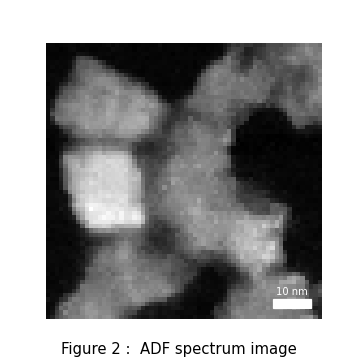

In [9]:
#SI ADF image
fig2, ax2 = pretty_fig(si[4], scale_bar_size = 10, pad = 1, font_size = 8, scale_bar_height = 2, scale_bar_color = 'white' )
fig2_caption="Figure 2 :  ADF spectrum image"
txt = plt.figtext(0.5, 0.01, fig2_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.savefig(fig_save_path + '/SI.png', dpi = 300)

In [10]:
#set elements
elements =['Ni', 'Co',  'Cr', 'Cs'] 
#['C','Cu', 'Ni', 'Co', 'Fe', 'Cr', 'Cs', 'Si', 'Al','Au']
print('specified elements : ')
print(elements)

specified elements : 
['Ni', 'Co', 'Cr', 'Cs']


In [11]:
#align to ZLP -
eels_ll = si[2]
eels_hl = si[1]

eels_ll.align_zero_loss_peak(also_align = [eels_hl], subpixel = True, print_stats = False, show_progressbar = False)

In [ ]:
#PCA first to get rid of noise - only keep first 3 or 4 componenet then 

### Thickness estimation
For single scattering:
$\frac{t}{\lambda}\leq 1 $

<IPython.core.display.Javascript object>


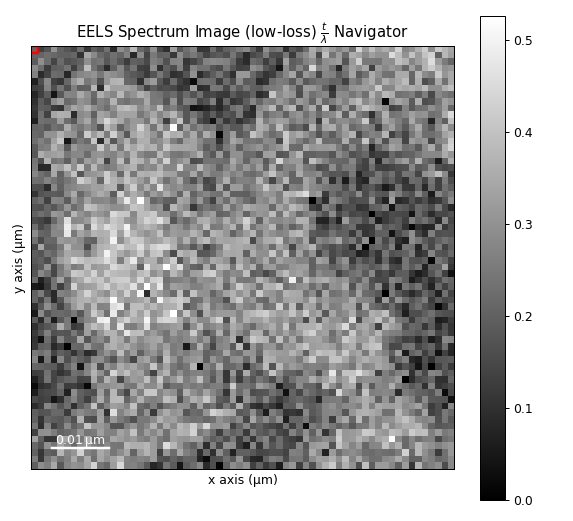

In [12]:
## Estimate thickness
#need to get zlp to pass to estimate thickness
zlp = eels_ll.isig[-3.:3.] #index with float to use calibrated units
#check zlp
#zlp.plot()

thickness = eels_ll.estimate_thickness(threshold = 200, zlp = zlp)
thickness.data[thickness.data<0] = 0
#(400)
#kwargs = {"vmin":"0"}
thickness.plot()


### Removing background from high loss data


In [186]:
#interactive background removal - untick "Fast"
#get high loss sum spectrum
#eels_sum = eels_hl.sum()
#eels_hl.remove_background()
# (signal_range = (480., 1500.), fast = False, background_type = 'PowerLaw')

In [187]:
#eels_hl.remove_background()

In [188]:
#eels_sum = eels_hl.sum()
#eels_sum.plot()

<IPython.core.display.Javascript object>


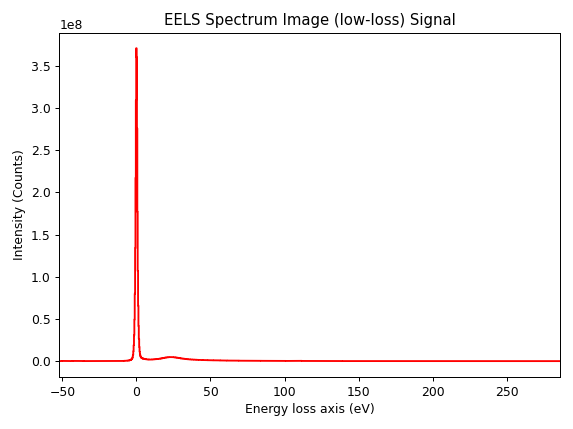

<IPython.core.display.Javascript object>


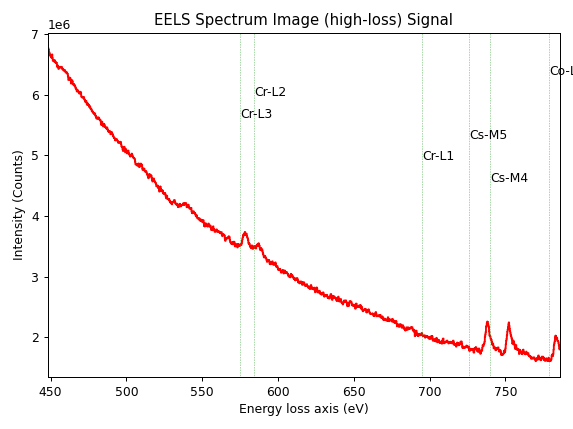

<IPython.core.display.Javascript object>


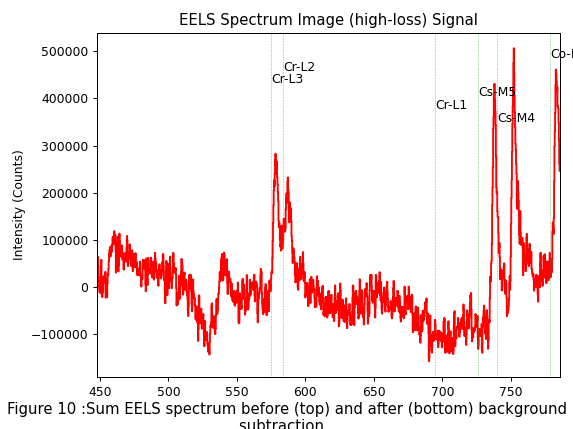

In [15]:
#plot low loss data
low_loss_sum = eels_ll.sum()
low_loss_sum.plot()

#get high loss sum spectrum
eels_sum = eels_hl.sum()

#build list of elements 
eels_sum.add_elements(elements)
edges = list(eels_sum.subshells)

sub_shells = []

#get edge energies
for edge in edges:
    element, subshell = edge.split('_')
    onset_energy = hs.material.elements[element]['Atomic_properties']['Binding_energies'][subshell]['onset_energy (eV)']
    sub_shells.append([element, subshell, onset_energy])

#and plot
eels_sum.plot()
fig_eels_sum = plt.gcf()

#remove background
eels_sum_bkgrnd= eels_sum.remove_background(signal_range = (480., 1500.), fast = False, background_type = 'PowerLaw')
#and plot
#eels_sum_bkgrnd = eels_sum
eels_sum_bkgrnd.plot()
fig10_caption="Figure 10 :Sum EELS spectrum before (top) and after (bottom) background subtraction. "
plt.xlabel(" ")
txt = plt.figtext(0.5, 0.0, fig10_caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
fig_eels_sum_bkgrnd = plt.gcf()
figs = [fig_eels_sum,fig_eels_sum_bkgrnd ]
i = 0
#add edge labels
for this_shell in sub_shells:
    for this_fig in figs:
        plt.figure(this_fig.number)
        y_pos = plt.ylim()[1] - 0.1 * plt.ylim()[1] + i* 0.05 * plt.ylim()[1]
        plt.axvline(this_shell[2], c='C2', ls=':', lw=0.5)
        plt.text(x= this_shell[2], y=y_pos, s=this_shell[0] + '-' + this_shell[1], color='k')
        plt.show()
    i = i -1 
    if i <=-9:
        i = 0



In [19]:
# function to list edges near specified energy (from Tim Poon)
elements_db = hs.material.elements.as_dictionary()
def get_edges_near_energy(energy, width=10):
    if width < 0:
         raise ValueError("Provided width needs to be >= 0.")

    Emin, Emax = energy - width/2, energy + width/2            

    # find all subshells that have its energy within range
    valid_edges = []
    for element, element_info in elements_db.items():
        #print(element)
        try:
            for shell, shell_info in element_info['Atomic_properties']['Binding_energies'].items():
                #print(shell, shell_info)
                if shell[-1] != 'a' and Emin <= shell_info['onset_energy (eV)'] <= Emax:
                    #print(shell, shell_info)
                    subshell = '{}_{}'.format(element, shell)
                    #print(subshell)
                    sub_shell_energy = shell_info['onset_energy (eV)']
                    #print(sub_shell_energy)
                    #sub_shell_shape = shell_info['']
                    #print(shell_info)
                    Ediff = np.abs(sub_shell_energy - energy)
                    valid_edges.append([subshell, Ediff,sub_shell_energy])  
                    #print(subshell, Ediff,sub_shell_energy)
        except KeyError:
            continue 
     # Sort by energy difference and return only the edges
    edges = [edge for edge, _, _ in sorted(valid_edges, key=lambda x: x[1])]
    edge_energies = [edge_nrg for _,_, edge_nrg in sorted(valid_edges, key=lambda x: x[1])]
    return edges, edge_energies

#get_edges_near_energy(760,width = 40)

In [164]:
#list onset energies of specified elements
print('Edge onset energies for specified elements :')
print("")
edges = list(eels_sum.subshells)
edges_sorted = [] #{'element': [], 'subshell' : [] , 'onset_energy' : []}
for edge in edges:
    element, subshell = edge.split('_')
    onset_energy = hs.material.elements[element]['Atomic_properties']['Binding_energies'][subshell]['onset_energy (eV)']
    #edges_dict['element'].append(element)
    #edges_dict['subshell'].append(subshell)
    #edges_dict['onset_energy'].append(onset_energy)
    edges_sorted.append((element, subshell, onset_energy))
    
edges_sorted.sort(key=lambda x: x[2])
#print(edges_sorted)
print("Element       subshell   edge_onset")
for ele1,ele2,ele3 in edges_sorted:
    print("{:<14}{:<11}{}".format(ele1,ele2,ele3))

Edge onset energies for specified elements :

Element       subshell   edge_onset
Cr            L3         575.0
Cr            L2         584.0
Cr            L1         695.0
Cs            M5         726.0
Cs            M4         740.0
Co            L3         779.0
Co            L2         794.0
Ni            L3         855.0
Ni            L2         872.0
Co            L1         926.0


In [125]:
#list edges near a defined energy
#get_edges_near_energy(760)

#show edge details 
#hs.material.elements[element]['Atomic_properties']['Binding_energies'][subshell]#['filename']


## Inspect reference line shape from database 

In [115]:
#view reference spectra
from hyperspy.misc import eels
#view specturm of a particular element
element = 'Cr'
alist = eels.eelsdb.eelsdb(spectrum_type = 'coreloss',element = element)
#or search by energy range
#alist = eels.eelsdb.eelsdb(spectrum_type = 'coreloss', min_energy =730, max_energy = 770)
#hyperspy.misc.eels.eelsdb.eelsdb(spectrum_type=None, title=None, author=None, element=None, formula=None, edge=None, min_energy=None, max_energy=None, resolution=None, min_energy_compare='gt', max_energy_compare='lt', resolution_compare='lt', max_n=-1, monochromated=None, order=None, order_direction='ASC')
print('reference data available for ' + element + ':')
alist

reference data available for Cr:


[<EELSSpectrum, title: Chromium, dimensions: (|1020)>,
 <EELSSpectrum, title: Chromium oxide (Chromia), dimensions: (|1024)>,
 <EELSSpectrum, title: Chromium carbide, dimensions: (|1024)>,
 <EELSSpectrum, title: Chromium carbide, dimensions: (|1024)>,
 <EELSSpectrum, title: Chromium carbide, dimensions: (|1024)>,
 <EELSSpectrum, title: Chromium carbide, dimensions: (|1024)>,
 <EELSSpectrum, title: Chromium monocarbide, dimensions: (|1340)>,
 <EELSSpectrum, title: TbS-CrS2 Misfit Nanotube, dimensions: (|2048)>]

<IPython.core.display.Javascript object>


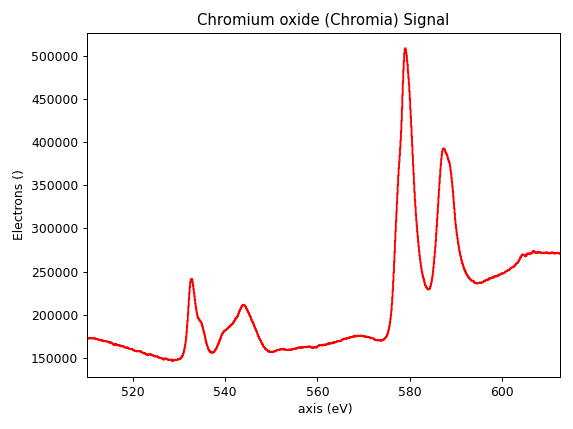

In [116]:
alist[1].plot()

## Build elemental maps from integration under edge

In [20]:
#remove background from full spectrum image
eels_hl_bkgrnd = eels_hl.remove_background(signal_range = (480., 550.), fast = False, background_type = 'PowerLaw', show_progressbar = False)
#eels_hl_bkgrnd = eels_hl

<IPython.core.display.Javascript object>


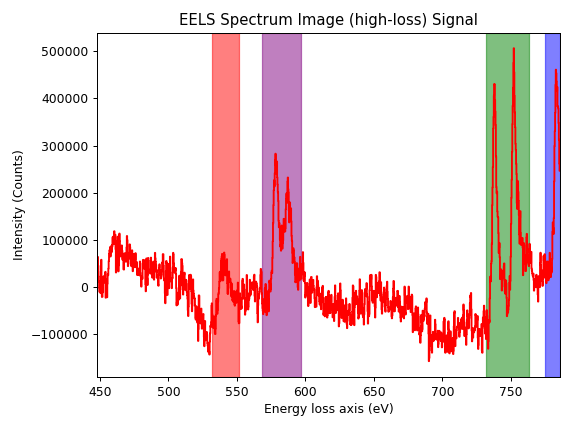

In [22]:
#map by integration under region - may have to run twice
#number of regions to integrate under
n_regions = 4 # max 6
if n_regions > 6:
    n_regions = 6
#color iterator
color_list = ['red', 'purple', 'green', 'blue', 'orange', 'grey']
color=iter(color_list)

#spectrum energy range
spec_min_max = eels_hl.axes_manager.signal_extent
spec_range = spec_min_max[1] -spec_min_max[0]
spec_step = spec_range / n_regions
spec_width = spec_step / 2
roi_list = []

eels_sum_bkgrnd.plot()

for i in range(n_regions):
    c=next(color)
    roi_start =  spec_min_max[0] + i * spec_step
    roi_end = roi_start + spec_width
    #select region to map
    roi_list.append(hs.roi.SpanROI(left=roi_start, right=roi_end))   
    roi_list[-1].add_widget(eels_sum_bkgrnd, axes=["Energy loss"], color = c)


    #edge_roi = hs.roi.SpanROI
    #map_edge_1 = eels_hl.T.inav[500:600]
    #map_edge_1.plot()
    #eels_hl

<IPython.core.display.Javascript object>


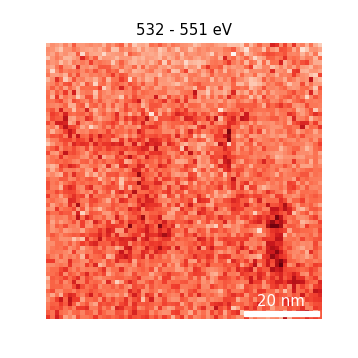

<IPython.core.display.Javascript object>


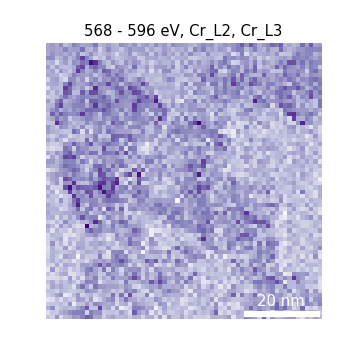

<IPython.core.display.Javascript object>


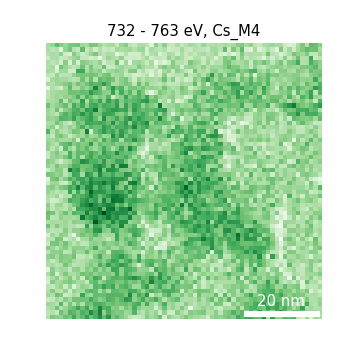

<IPython.core.display.Javascript object>


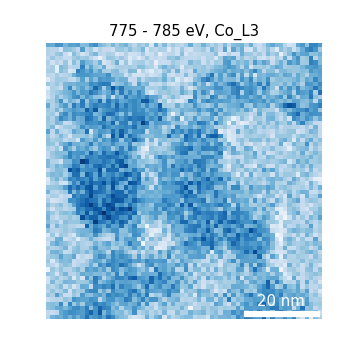

In [23]:
#plot maps
map_list = []
map_color=iter(['Reds', 'Purples', 'Greens', 'Blues', 'Oranges', 'Greys'])

for this_roi in roi_list:
    mc = next(map_color)
    map_list.append(eels_hl_bkgrnd.isig[this_roi].sum(-1))
    map_fig, map_ax = pretty_fig(map_list[-1], loc = 4, scale_bar_size = 20, font_size = 12, scale_bar_height = 1, scale_bar_color = 'white', pad = 0.1,  axis_on = False, scale_bar_units = 'nm', cmap = mc)
    start_energy = this_roi.left
    end_energy = this_roi.right
    map_list[-1].metadata.Signal.add_node("energy_range")
    map_list[-1].metadata.Signal.energy_range = start_energy,end_energy
    nrg_range = end_energy - start_energy
    mid_nrg = start_energy + ((nrg_range)/2)
    #print(mid_nrg)
    g_el, g_nrg = get_edges_near_energy(mid_nrg, width = nrg_range)
    this_el = []
    str_title = str(int(start_energy)) + ' - ' + str(int(end_energy)) + ' eV'
    for an_el in g_el:
        if an_el.split("_")[0] in elements:
            str_title = str_title + ', ' + an_el
            #this_el.append(an_el)
    #str_title = str(start_energy) + ' - ' + str(end_energy) + ' eV'
    #for an_el
    #str_title = str_title.join(this_el)
    plt.title(str_title)
    map_list[-1].metadata.Signal.add_node("")
    #plt.figure()
    #plt.imshow(map_list[-1].data, cmap= mc, alpha = 0.4)

#plt.imshow(eds_maps[map_list].data, cmap= 'Reds', alpha = 0.4)

### Linescans

<IPython.core.display.Javascript object>


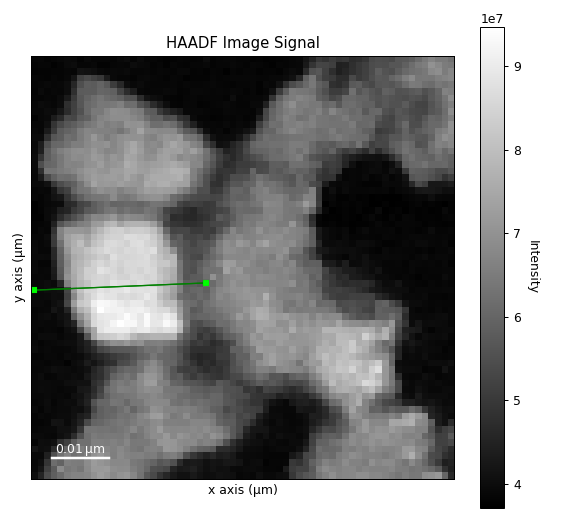

In [27]:
#linescan
ls_roi = hs.roi.Line2DROI(0, 0, 10, 10, linewidth =3)
#map_list[-1].plot()
si[4].plot()
this_line = ls_roi.interactive(si[4])#map_list[-1])
line_fig = plt.gcf()
plt.show()


<IPython.core.display.Javascript object>


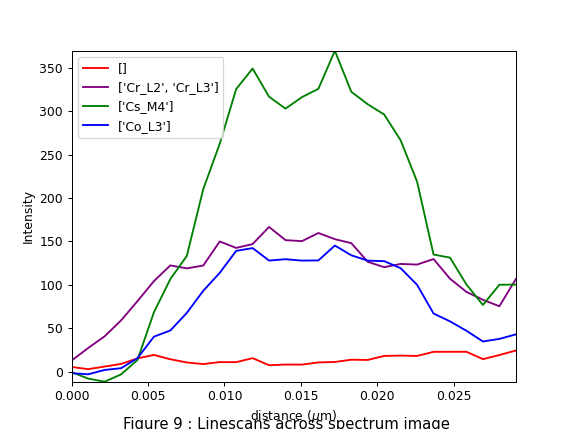

In [28]:
#plot all elements in list. 
#this_line.plot()
n = 0
line_scans = []
line_list = []
#element_str = eds_maps[n].metadata['Sample']['elements'][0]
for this_map in map_list:
    line_scans.append(ls_roi(this_map).as_signal1D(0))
    this_line = this_map.metadata['Signal']['energy_range']
    nrg_range = this_line[1] - this_line[0]
    mid_nrg = this_line[0] + ((nrg_range)/2)
    #mid_nrg = this_line[0] + ((this_line[1] - this_line[0])/2)
    #print(mid_nrg)
    g_el, g_nrg = get_edges_near_energy(mid_nrg, width = nrg_range)
    this_el = []
    for an_el in g_el:
        if an_el.split("_")[0] in elements:
            this_el.append(an_el)
    line_list.append( this_el)
hs.plot.plot_spectra(line_scans, style = 'overlap', color = color_list)#, legend='auto')
plt.legend(line_list)

plt.xlabel('distance ($\mu$m)')
fig9_caption="Figure 9 : Linescans across spectrum image"
txt = plt.figtext(0.5, 0.000, fig9_caption, wrap=True, horizontalalignment='center', fontsize=12)
#plt.savefig(fig_save_path + '/edx_line_scans.png', dpi = 300)